## Victim's Age in LA Crime Data 

Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [4]:
# Importing file
import pandas as pd

la_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
la_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
# Checking all the columns in the dataset
la_crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
# Checking for missing values
la_crime.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            82977
Vict Age               0
Vict Sex           79322
Vict Descent       79327
Premis Cd              7
Premis Desc          278
Weapon Used Cd    387216
Weapon Desc       387216
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          553999
Crm Cd 3          598207
Crm Cd 4          599706
LOCATION               0
Cross Street      499205
LAT                    0
LON                    0
dtype: int64

In [9]:
# Checking for missing values again
la_crime_df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [10]:
# Sorting types of weapon used
weapons = la_crime_df['Weapon Desc'].value_counts()
weapons

0                                                 387216
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    113862
UNKNOWN WEAPON/OTHER WEAPON                        21855
VERBAL THREAT                                      15383
HAND GUN                                           13194
                                                   ...  
ANTIQUE FIREARM                                        6
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    1
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
Name: Weapon Desc, Length: 79, dtype: int64

Selecting and Describing Varibles for the Analysis 

In [11]:
# For this project I will be focusing on the following 5 varibles 
la_crime_sub = la_crime_df[['Vict Age','Vict Sex', 'Vict Descent',\
                            'DATE OCC','TIME OCC','Weapon Desc',\
                            'Weapon Used Cd']]

 
Describe what the 5 variables mean in the dataset
1. Vic Age: is the age of the victim and it is numerical vlaue 
2. Vic Sex: is the sex of the victim,F is for Female, M is for Male V and  X is for unknow 
3. Vic descent: is the race of the victim 
4. Date OCC: is date the incident happen 
5. Time OCC: is the time the incident happen. it uses 0000 format
6. Weapon Desc: is the weapon used to assulat the victim
7. Weapon Used Desc Cd: is code assigned to differnt weapon types

In [12]:
la_crime_sub.isnull().sum()

Vict Age          0
Vict Sex          0
Vict Descent      0
DATE OCC          0
TIME OCC          0
Weapon Desc       0
Weapon Used Cd    0
dtype: int64

In [13]:
# filterning out 0 values and assigning to new dataset
df3 = la_crime_sub.loc[(la_crime_sub != 0).all(axis=1), :]

In [14]:
# Distribution summary of the dataset
# The value for Weapon Used Cd are not relelvant since the values indicate only code
df3.describe()

,Vict Age,TIME OCC,Weapon Used Cd
count,195570.000000,195570.000000,195570.000000
mean,37.429953,1351.398752,363.738334
std,15.338047,671.506780,121.086959
min,-1.000000,1.000000,101.000000
25%,26.000000,910.000000,311.000000
50%,35.000000,1435.000000,400.000000
75%,48.000000,1915.000000,400.000000
max,99.000000,2359.000000,516.000000


In [15]:
# checking the data type again
df3.dtypes

Vict Age            int64
Vict Sex           object
Vict Descent       object
DATE OCC           object
TIME OCC            int64
Weapon Desc        object
Weapon Used Cd    float64
dtype: object

In [18]:
# Checking for feilds 
df3.head()

,Vict Age,Vict Sex,Vict Descent,DATE OCC,TIME OCC,Weapon Desc,Weapon Used Cd
0,36,F,B,1/8/2020 0:00,2230,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
1,25,M,H,1/1/2020 0:00,330,UNKNOWN WEAPON/OTHER WEAPON,500.0
5,25,F,H,1/1/2020 0:00,30,UNKNOWN WEAPON/OTHER WEAPON,500.0
10,29,M,A,1/4/2020 0:00,2200,ROCK/THROWN OBJECT,306.0
11,35,M,O,1/5/2020 0:00,955,VERBAL THREAT,511.0


Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain 
the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [19]:
df3.head()

,Vict Age,Vict Sex,Vict Descent,DATE OCC,TIME OCC,Weapon Desc,Weapon Used Cd
0,36,F,B,1/8/2020 0:00,2230,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
1,25,M,H,1/1/2020 0:00,330,UNKNOWN WEAPON/OTHER WEAPON,500.0
5,25,F,H,1/1/2020 0:00,30,UNKNOWN WEAPON/OTHER WEAPON,500.0
10,29,M,A,1/4/2020 0:00,2200,ROCK/THROWN OBJECT,306.0
11,35,M,O,1/5/2020 0:00,955,VERBAL THREAT,511.0


In [20]:
from matplotlib import pyplot as plt

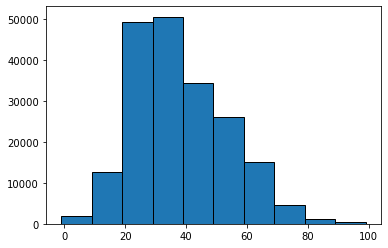

In [21]:
# Plotting the age distribution 
plt.hist(df3['Vict Age'],edgecolor='black')
plt.show()

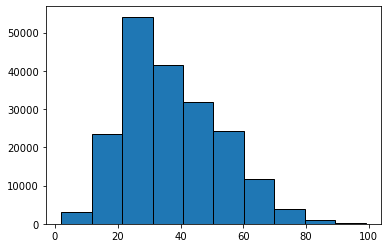

In [22]:
# Dropping row where there is negative age
df3 = df3.drop(df3[df3['Vict Age'] == -1].index)
plt.hist(df3['Vict Age'],edgecolor='black')
plt.show()

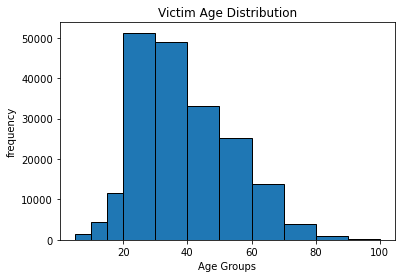

In [23]:

# Setting specific age bin

age_bin = [5,10,15,20,30,40,50,60,70,80,90,100]
plt.hist(df3['Vict Age'],bins= age_bin, edgecolor='black')
plt.title('Victim Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('frequency')
plt.show()

In [24]:
# Most victims are between age 20 and 40.
# The majority of the case is for age gropus btw 20 to 60.
# There are aslo victim below age of 10 and above 90

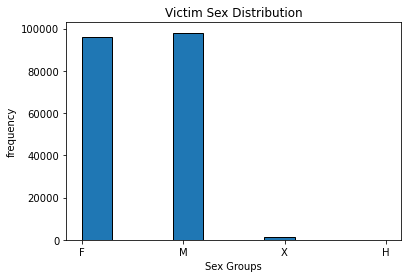

In [25]:
# Distibution for sex
plt.hist(df3['Vict Sex'], edgecolor='black')
plt.title('Victim Sex Distribution')
plt.xlabel('Sex Groups')
plt.ylabel('frequency')
plt.show()

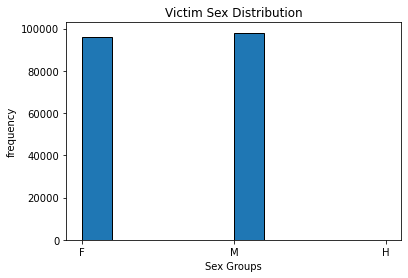

In [26]:
# Distibution for sex after dropping unknown sex 
df3 = df3.drop(df3[df3['Vict Sex'] == 'X'].index) 
plt.hist(df3['Vict Sex'], edgecolor='black')
plt.title('Victim Sex Distribution')
plt.xlabel('Sex Groups')
plt.ylabel('frequency')
plt.show()

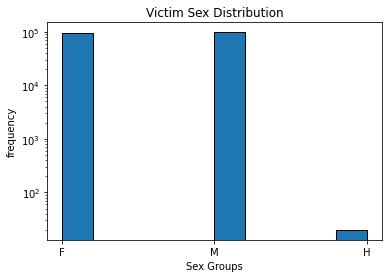

In [27]:
# The distribution of Female and Male is almost equal
#  using log I will normalize the scale
plt.hist(df3['Vict Sex'], edgecolor='black', log= True)
plt.title('Victim Sex Distribution')
plt.xlabel('Sex Groups')
plt.ylabel('frequency')
plt.show()

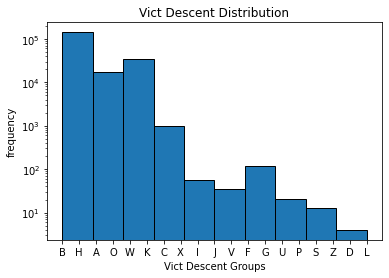

In [28]:
# Disctribution of Vict Descent
#  using log I will normalize the scale
plt.hist(df3['Vict Descent'], edgecolor='black',log = True)
plt.title('Vict Descent Distribution')
plt.xlabel('Vict Descent Groups')
plt.ylabel('frequency')
plt.show()

In [279]:
# The plot indicates most of the victims are Balck and Hispanic

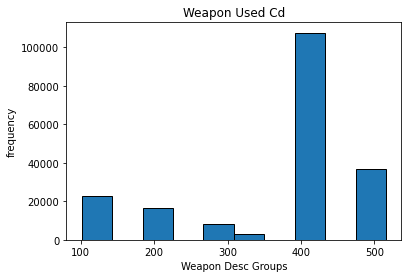

In [29]:
# Distribution of Type of Weapon used 
plt.hist(df3['Weapon Used Cd'], edgecolor='black')
plt.title('Weapon Used Cd')
plt.xlabel('Weapon Desc Groups')
plt.ylabel('frequency')
plt.show()


In [30]:
# Most frequenty used weapon is Cd 400, which is STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)

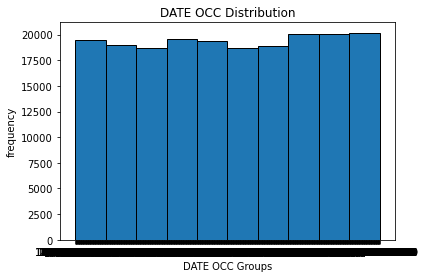

In [31]:
# DATE OCC distribution 
plt.hist(df3['DATE OCC'], edgecolor='black')
plt.title('DATE OCC Distribution')
plt.xlabel('DATE OCC Groups')
plt.ylabel('frequency')
plt.show()

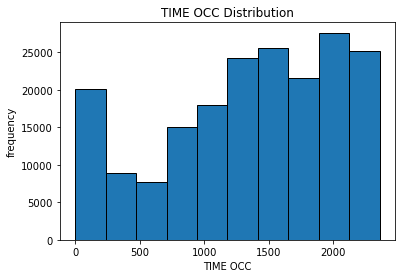

In [34]:
# Finally I will look the frequency of crime based on the time it occured
# Time was extracted from the date in earlier step
#bins_time=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(df3['TIME OCC'],edgecolor='black')
plt.title('TIME OCC Distribution')
plt.xlabel('TIME OCC')
plt.ylabel('frequency')
plt.show()


Most incidents happen in the afternoon and in the evening 

In [35]:
# Summerizing the distribution for the dataframe
# Applying this to numeric data set Age
df3.describe()

,Vict Age,TIME OCC,Weapon Used Cd
count,194020.000000,194020.000000,194020.000000
mean,37.524595,1350.821725,364.211040
std,15.319560,671.627184,120.652396
min,2.000000,1.000000,101.000000
25%,26.000000,910.000000,312.000000
50%,35.000000,1430.000000,400.000000
75%,48.000000,1915.000000,400.000000
max,99.000000,2359.000000,516.000000


Based on the summary the average age of a vitcim is 37
The average time for crime to happen is around 2pm, with most crime happing before 7pm



Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.
Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. 
Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable,
but breaking the data out based on criteria we are exploring (Chapter 3).

In [37]:
# I am going to look the distribution in time of incident
# when the gender is M or F
#df2=df[df['Fee']==22000]['Courses']
time_w = df3[df3['Vict Sex']== 'F']['TIME OCC']
time_m = df3[df3['Vict Sex']== 'M']['TIME OCC']
print(time_w.mean())
print(time_m.mean())

1343.4865447950974
1358.0479847427896


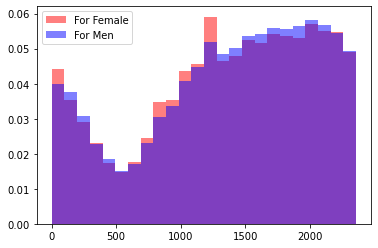

In [38]:
import numpy as np
heights_w, bins_w = np.histogram(time_w, bins=24)
heights_w = heights_w/sum(heights_w)
bin_centers_w = 0.5*(bins_w[1:] + bins_w[:-1])
bin_widths_w = np.diff(bins_w)
plt.bar(bin_centers_w, heights_w, width=bin_widths_w, \
        color="red", alpha=0.5, label='For Female')

heights_m, bins_m = np.histogram(time_m, bins=24)
heights_m = heights_m/sum(heights_m)
bin_centers_m = 0.5*(bins_m[1:] + bins_m[:-1])
bin_widths_m = np.diff(bins_m)
plt.bar(bin_centers_m, heights_m, width=bin_widths_m, \
        color="blue", alpha=0.5,label='For Men')
plt.legend(loc='best')
plt.show()



Females have higher probablity to be a victim around mid night and in the day time compare to males
Males have higher propbality of being a victim in the afternoon and at night compare to females.

Step 6
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your
variable and how does it address the question you are trying to answer (Chapter 4).

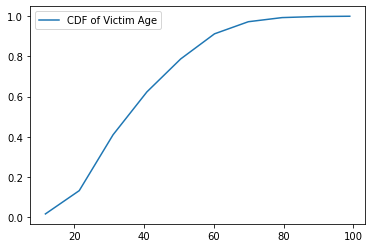

In [39]:
# getting data of the histogram
count, bins_count = np.histogram(df3['Vict Age'], bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="CDF of Victim Age")
plt.legend()

About 15% of the victims are below 20 and aboy 75% of the victims are below 50 years

Plot 1 analytical distribution and provide your analysis 
on how it applies to the dataset you have chosen (Chapter 5)

In [299]:
import scipy.stats

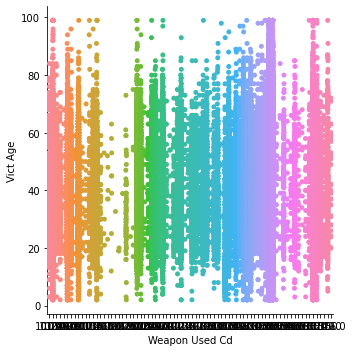

In [40]:
# Plotting Scatter plot for Victim age and type of weapon used 
import seaborn as sns

sns.catplot(x='Weapon Used Cd', y= 'Vict Age', \
            data= df3, kind= 'strip')
plt.show()

 The type of weapon used have different frequency for differnt age groups 

In [41]:
df3.head()

,Vict Age,Vict Sex,Vict Descent,DATE OCC,TIME OCC,Weapon Desc,Weapon Used Cd
0,36,F,B,1/8/2020 0:00,2230,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
1,25,M,H,1/1/2020 0:00,330,UNKNOWN WEAPON/OTHER WEAPON,500.0
5,25,F,H,1/1/2020 0:00,30,UNKNOWN WEAPON/OTHER WEAPON,500.0
10,29,M,A,1/4/2020 0:00,2200,ROCK/THROWN OBJECT,306.0
11,35,M,O,1/5/2020 0:00,955,VERBAL THREAT,511.0


Step 8:Create two scatter plots comparing two variables and provide your analysis on correlation
and causation. Remember, covariance, Pearson’s correlation, 
and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

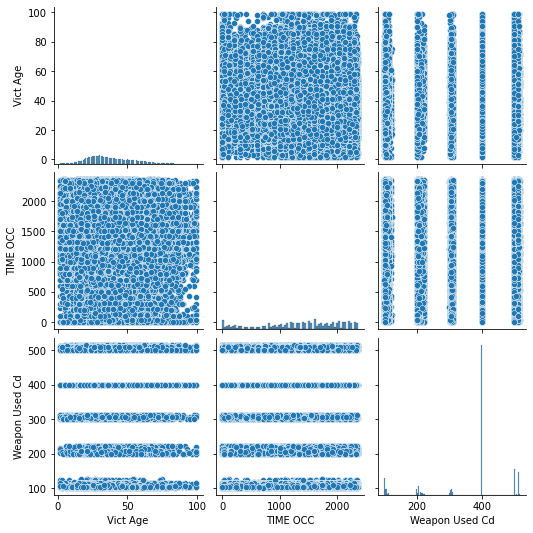

In [42]:
# Getting scatter plot for all pairs in the data frame
sns.pairplot(df3)

In [43]:
# Finding Correlation between age and time
np.corrcoef(df3['Vict Age'], df3['TIME OCC'])

array([[1.        , 0.00463068],
       [0.00463068, 1.        ]])

In [44]:
# Computing corrlation 
# There is no strong correlation between points
df3.corr(method ='pearson')

,Vict Age,TIME OCC,Weapon Used Cd
Vict Age,1.000000,0.004631,0.063431
TIME OCC,0.004631,1.000000,-0.001673
Weapon Used Cd,0.063431,-0.001673,1.000000


In [45]:
# Computing covarinace 
df3.cov()

,Vict Age,TIME OCC,Weapon Used Cd
Vict Age,234.688931,47.645247,117.242553
TIME OCC,47.645247,451083.074372,-135.575358
Weapon Used Cd,117.242553,-135.575358,14557.000638


There is no strong corelation between the pairs.

Conduct a test on your hypothesis using one of the methods covered in Chapter 9


Hypothesis: The age of the victim differ based on gender and race.
First will tests if there is relation between victim's age and gender
The Null Hypothesis is there is no relationship between victims age and gender

In [46]:
#Grouping victim's age by gender
df3['Vict Age'].groupby(df3['Vict Sex']).mean()

Vict Sex
F    36.080523
H    37.000000
M    38.937788
Name: Vict Age, dtype: float64

In [47]:
# Splitting the data frame based on sex

age_f = df3[df3['Vict Sex']== 'F']
age_m = df3[df3['Vict Sex']== 'M']

In [48]:

from scipy.stats import ttest_ind

In [49]:
# Perfoming two samples t-test
ttest_ind(age_f['Vict Age'],age_m['Vict Age'])

Ttest_indResult(statistic=-41.252552695201196, pvalue=0.0)

The result indicate that there is statisticaly significance differnce in victim age based on if they are male or female

This shows there is statistcaly significane association between victim's age and sex

Next I will see if there is a relation between sex and Vic Descent 

In [50]:
# Creating contingency table for Victim's age and race
from scipy.stats import chi2_contingency 
chisqt_age_des = pd.crosstab(df3['Vict Age'], \
                             df3['Vict Descent'], margins=True)
c, p, dof, expected = chi2_contingency(chisqt_age_des)
p

0.0

This shows there is statistcaly significane association between victim's age and race

Final For this project, conduct a regression analysis on either one dependent and one explanatory variable, 
or multiple explanatory variables (Chapter 10 & 11).

In [51]:

import statsmodels.formula.api as smf

In [52]:
#reg1 = 'df3[`Vict Age`]~ df3[`Vict Sex`]'
# Renaming colomns name by eliminating space between words.
# This is to help with error when using the regression formula
# I will make copy of the data frame before changing the column names
df4=df3.copy()
#df3.head()
#df4.head()
df4.columns = ['VictAge','VictSex','VictDescent','DATEOCC','TIMEOCC', \
               'WeaponDesc','WeaponCd']
df4.head()

,VictAge,VictSex,VictDescent,DATEOCC,TIMEOCC,WeaponDesc,WeaponCd
0,36,F,B,1/8/2020 0:00,2230,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
1,25,M,H,1/1/2020 0:00,330,UNKNOWN WEAPON/OTHER WEAPON,500.0
5,25,F,H,1/1/2020 0:00,30,UNKNOWN WEAPON/OTHER WEAPON,500.0
10,29,M,A,1/4/2020 0:00,2200,ROCK/THROWN OBJECT,306.0
11,35,M,O,1/5/2020 0:00,955,VERBAL THREAT,511.0


In [54]:
reg1= 'VictAge ~ VictSex + VictDescent + TIMEOCC'
reg1out = smf.ols(reg1,df4).fit()

In [55]:
print(reg1out.summary())

                            OLS Regression Results                            
Dep. Variable:                VictAge   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:16:22   Log-Likelihood:            -8.0109e+05
No. Observations:              194020   AIC:                         1.602e+06
Df Residuals:                  193998   BIC:                         1.602e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           39.9497      0.242  

R squared is not high , the model only describe the 38% variation that is seen in the model
There are some demogrpahic groups that have negative correaltion.
There is relatively strong positive coefficent with male gender. 


## Summary

My project uses crime data from LA, USA.

In this analysis, I set out to test whether the age of victims is different based on sex and race.

The analysis shows that the distribution of victim's age encompass all age groups. Most of the victims were between the ages of

20 and 60. There were also very young and old victims in the group.

The data shows a statistically significant mean victim age difference between female and male victims, with male victims being older. There is also a statistically significant relationship between the victim's age and race.

This analysis would have benefited from having more numerical data points. In addition, if the dataset has an identifier to indicate whether the victim were residents or visitors, it will help to explain some of the observations better.

One of my assumption before starting the analysis was that I expected to see more incidents in the evening. But the data shows most crimes happen between the afternoon and early evening.

The challenges I face doing this analysis have to do with most of my variables being categorical.

If I had additional numeric variables whose measurement is related to crime, it would make it easier to do a regression model